Set Basic Info.

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science_Public/question_generation/Datasets'
os.chdir(proj_dir)

Mounted at /content/drive


In [2]:
trait = "Obesity"
condition = 'Epilepsy'

1. Gene Data Preparation

In [3]:
!pip install sparse_lmm

In [4]:
geo_root = '/content/drive/MyDrive/AI4Science_Public/question_generation/Datasets/GEO'

Gene Data for Condition

In [6]:
import gzip
import pandas as pd
import os
import io

# Process the clinical data to get the mapping between gene names and gene probes.
condition_clinical_data_path = os.path.join(geo_root, '128_Gene_SCNA_Trait_Epilepsy/GSE229754/GSE229754_family.soft.gz')

with gzip.open(condition_clinical_data_path, 'rt') as f:
    contents = f.read()
# Remove the lines that start with '^, '!', and '#' using the str.startswith() method
lines = contents.split('\n')
filtered_lines = [line for line in lines if not (line.startswith('^') or line.startswith('!') or line.startswith('#'))]
filtered_content = '\n'.join(filtered_lines)
condition_map_data = pd.read_csv(io.StringIO(filtered_content), delimiter='\t',low_memory=False)
print("Map data:")
# map_data['Gene Symbol']  # Gene names. Some of the series only provide accession of gene in GenBank (e.g., GB_ACC), you need to use GB_ACC to search for the gene name in GeneBank website.
# map_data['ID']  # Gene probes that exit both in gene data and map data
condition_map_data = condition_map_data.loc[:,['ID','GENE_SYMBOL']]
condition_map_data = condition_map_data.dropna()
condition_map_data

Map data:


,ID,GENE_SYMBOL
0,A_42_P453055,Bcam
1,A_42_P453171,Cdc42ep4
2,A_42_P453894,RGD1306682
3,A_42_P453935,Naca
4,A_42_P453959,Lrsam1
...,...,...
30358,A_64_P397764,Setdb1
30360,A_64_P398958,Dcun1d1
30362,A_64_P399184,Utrn
30365,A_64_P399235,Nmu


In [7]:
condition_gene_data_path = os.path.join(geo_root, '128_Gene_SCNA_Trait_Epilepsy/GSE229754/GSE229754_series_matrix.txt.gz')
condition_gene_data = pd.read_csv(condition_gene_data_path, compression='gzip',skiprows=52, comment='!', delimiter='\t')
print("Gene Data:")
condition_gene_data = condition_gene_data.dropna()
condition_gene_data

Gene Data:


,ID_REF,GSM7177374,GSM7177375,GSM7177376,GSM7177377,GSM7177378,GSM7177379,GSM7177380,GSM7177381,GSM7177382,GSM7177383,GSM7177384,GSM7177385,GSM7177386,GSM7177387,GSM7177388
12,A_42_P453171,9.618717,8.433863,9.538087,9.543251,10.020039,9.719509,9.633360,9.942926,8.854783,9.871650,9.534143,9.937196,9.731444,9.777521,9.488116
13,A_42_P453894,9.891297,8.778094,10.309369,10.504767,10.127184,10.482978,10.689914,10.721436,10.318286,10.250974,10.579251,10.805895,10.943878,10.648225,10.866075
14,A_42_P453935,12.300565,11.692756,12.274402,12.164944,12.390719,12.426871,12.293867,12.501291,11.949930,12.204927,12.219418,12.532548,12.435750,12.379909,12.252109
17,A_42_P454206,6.419549,3.914837,6.681351,6.771357,6.818306,7.073187,6.651998,7.199519,6.110339,6.252654,6.760677,6.637709,6.878462,7.278894,7.259604
18,A_42_P454301,12.669386,12.223194,12.660629,12.895776,12.932032,12.815297,12.764904,12.854589,12.129087,12.508982,12.740267,12.332501,12.623375,12.839585,12.792170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30367,A_64_P397603,8.604895,6.791420,8.578824,8.916556,8.941005,8.748435,8.263013,8.718706,7.702032,8.103861,8.239041,8.726280,8.696163,8.620053,8.834110
30369,A_64_P397764,6.294718,2.991078,6.270126,6.460323,6.452069,6.866693,7.285396,7.369830,5.708269,6.671698,6.464210,6.647207,6.614118,6.826876,6.730248
30370,A_64_P398458,6.191708,3.231680,5.847335,6.137699,6.271510,6.693318,7.283456,7.404812,5.446062,6.583452,6.656914,6.480255,6.492979,6.822436,6.627117
30371,A_64_P398958,11.284572,9.839953,10.851705,11.314264,11.087103,11.315453,11.328159,11.265058,11.322431,11.285916,11.583983,11.845487,12.017881,11.664360,10.804791


In [9]:
condition_gene_data = pd.merge(condition_map_data.rename(columns={'ID':'ID_REF'}), condition_gene_data, on='ID_REF').drop(columns='ID_REF').set_index('GENE_SYMBOL')

condition_gene_data.rename(str.lower, axis='index', inplace=True)
condition_gene_data

,GSM7177374,GSM7177375,GSM7177376,GSM7177377,GSM7177378,GSM7177379,GSM7177380,GSM7177381,GSM7177382,GSM7177383,GSM7177384,GSM7177385,GSM7177386,GSM7177387,GSM7177388
GENE_SYMBOL,,,,,,,,,,,,,,,
cdc42ep4,9.618717,8.433863,9.538087,9.543251,10.020039,9.719509,9.633360,9.942926,8.854783,9.871650,9.534143,9.937196,9.731444,9.777521,9.488116
rgd1306682,9.891297,8.778094,10.309369,10.504767,10.127184,10.482978,10.689914,10.721436,10.318286,10.250974,10.579251,10.805895,10.943878,10.648225,10.866075
naca,12.300565,11.692756,12.274402,12.164944,12.390719,12.426871,12.293867,12.501291,11.949930,12.204927,12.219418,12.532548,12.435750,12.379909,12.252109
armc8,6.419549,3.914837,6.681351,6.771357,6.818306,7.073187,6.651998,7.199519,6.110339,6.252654,6.760677,6.637709,6.878462,7.278894,7.259604
tnpo2,12.669386,12.223194,12.660629,12.895776,12.932032,12.815297,12.764904,12.854589,12.129087,12.508982,12.740267,12.332501,12.623375,12.839585,12.792170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dcaf8,6.569852,3.985892,6.425857,6.561163,6.595550,6.915146,7.138924,7.310038,5.562462,6.771053,6.929620,6.893683,6.514781,6.881367,6.818160
prdm4,5.853281,3.941980,6.431147,6.009738,6.591733,6.181138,6.369072,6.677113,4.859847,6.465117,6.149583,6.764878,6.825585,6.813783,5.991190
zfp212,8.957126,7.321628,9.182921,9.249625,9.202847,9.296213,9.027945,9.605019,9.132074,9.082804,9.430087,9.579921,9.440371,9.314794,9.338844


Gene Data for Trait

In [11]:
trait_clinical_data_path = os.path.join(geo_root, '3_Gene_FTO_Trait_Obesity/GSE78958/GSE78958_family.soft.gz')

with gzip.open(trait_clinical_data_path, 'rt') as f:
    contents = f.read()
#Remove the lines that start with '^, '!', and '#' using the str.startswith() method
lines = contents.split('\n')
filtered_lines = [line for line in lines if not (line.startswith('^') or line.startswith('!') or line.startswith('#'))]
filtered_content = '\n'.join(filtered_lines)
trait_map_data = pd.read_csv(io.StringIO(filtered_content), delimiter='\t',low_memory=False)
print("Map data:")
#map_data_trait['GENE_SYMBOL']#Gene names. Some of the series only provide accession of gene in GenBank (e.g., GB_ACC), you need to use GB_ACC to search for the gene name in GeneBank website.
#map_data_trait['ID']#Gene probes that exit both in gene data and map data
trait_map_data = trait_map_data.loc[:,['ID','Gene Symbol']]
trait_map_data = trait_map_data.dropna()
trait_map_data

Map data:


,ID,Gene Symbol
0,1007_s_at,DDR1 /// MIR4640
1,1053_at,RFC2
2,117_at,HSPA6
3,121_at,PAX8
4,1255_g_at,GUCA1A
...,...,...
22232,AFFX-HUMGAPDH/M33197_M_at,GAPDH
22233,AFFX-HUMISGF3A/M97935_3_at,STAT1
22234,AFFX-HUMISGF3A/M97935_5_at,STAT1
22235,AFFX-HUMISGF3A/M97935_MA_at,STAT1


In [12]:
trait_gene_data_path = os.path.join(geo_root, '3_Gene_FTO_Trait_Obesity/GSE78958/GSE78958_series_matrix.txt.gz')

trait_gene_data = pd.read_csv(trait_gene_data_path, compression='gzip',skiprows=52, comment='!', delimiter='\t')
print("\nGene Data:")
trait_gene_data = trait_gene_data.dropna()
trait_gene_data


Gene Data:


,ID_REF,GSM2082085,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
0,1007_s_at,11.28850,11.03150,11.16710,10.99510,10.59830,10.66480,10.46060,10.86280,10.67120,...,11.33190,11.07390,11.03590,11.50600,10.82540,10.57120,11.13250,10.37340,10.98720,11.38370
1,1053_at,7.63904,7.26402,7.68085,6.69447,7.03229,7.67410,7.13190,7.17344,7.72702,...,7.47437,6.75757,7.39019,7.42222,7.81756,7.35957,7.13813,8.34150,8.30056,6.88597
2,117_at,8.04600,6.95939,7.66881,7.20154,7.44421,6.81892,7.69349,7.17604,7.43512,...,6.59420,6.07500,8.91532,8.47447,8.86056,7.58294,9.00407,9.44754,8.49592,7.98684
3,121_at,8.40344,8.10701,7.64901,7.61717,7.88172,7.42525,8.52529,8.85369,7.66742,...,8.12033,7.94675,8.36161,8.24828,8.09233,7.56064,7.90098,7.96661,8.30756,8.30535
4,1255_g_at,3.25795,3.23091,3.15074,3.80748,3.35172,3.32401,3.40824,3.53437,3.24152,...,3.55685,3.33472,3.96949,3.23512,3.40241,4.27268,3.10499,3.29700,3.69600,3.95314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22272,AFFX-ThrX-5_at,3.88166,3.80152,3.66039,3.35783,3.70256,3.83488,3.67033,4.05419,3.32463,...,4.13470,4.15608,4.21411,4.09967,3.87734,3.94543,3.82307,4.03133,3.99748,4.12102
22273,AFFX-ThrX-M_at,3.91730,3.47960,2.86268,2.99534,3.04051,3.56954,3.59695,3.38818,3.07477,...,3.59862,3.50953,3.78166,3.48145,3.99519,4.08996,4.10022,6.06674,3.49158,3.50046
22274,AFFX-TrpnX-3_at,3.16477,3.17312,2.99680,2.97375,3.20824,3.05029,3.05519,3.09737,2.88569,...,3.33134,3.07075,3.28115,3.29891,3.00888,2.94178,2.97901,3.08126,3.14365,3.18247
22275,AFFX-TrpnX-5_at,3.75914,3.69434,3.79928,3.88686,3.91584,3.82882,4.11923,4.05000,3.68115,...,3.90579,3.98690,4.11565,4.22331,3.89235,3.84259,3.83147,3.79138,3.98642,3.93776


In [14]:
trait_gene_data = pd.merge(trait_map_data.rename(columns={'ID':'ID_REF'}), trait_gene_data, on='ID_REF').drop(columns='ID_REF').set_index('Gene Symbol')
# Converts the gene names to lower case
trait_gene_data.rename(str.lower, axis='index', inplace=True)
trait_gene_data

,GSM2082085,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,GSM2082094,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
ddr1 /// mir4640,11.28850,11.03150,11.16710,10.99510,10.59830,10.66480,10.46060,10.86280,10.67120,10.97620,...,11.33190,11.07390,11.03590,11.50600,10.82540,10.57120,11.13250,10.37340,10.98720,11.38370
rfc2,7.63904,7.26402,7.68085,6.69447,7.03229,7.67410,7.13190,7.17344,7.72702,6.81676,...,7.47437,6.75757,7.39019,7.42222,7.81756,7.35957,7.13813,8.34150,8.30056,6.88597
hspa6,8.04600,6.95939,7.66881,7.20154,7.44421,6.81892,7.69349,7.17604,7.43512,8.23233,...,6.59420,6.07500,8.91532,8.47447,8.86056,7.58294,9.00407,9.44754,8.49592,7.98684
pax8,8.40344,8.10701,7.64901,7.61717,7.88172,7.42525,8.52529,8.85369,7.66742,8.91888,...,8.12033,7.94675,8.36161,8.24828,8.09233,7.56064,7.90098,7.96661,8.30756,8.30535
guca1a,3.25795,3.23091,3.15074,3.80748,3.35172,3.32401,3.40824,3.53437,3.24152,3.47329,...,3.55685,3.33472,3.96949,3.23512,3.40241,4.27268,3.10499,3.29700,3.69600,3.95314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gapdh,13.65790,13.14960,11.71850,12.80670,12.77510,13.00240,11.84720,12.28220,13.50270,12.96300,...,13.39520,13.01440,12.57790,13.40130,13.73630,13.80570,13.98530,14.18820,13.18030,13.33330
stat1,10.41710,12.25150,10.37870,10.56050,11.34770,11.99420,9.99272,9.95901,12.43690,9.67842,...,9.90338,9.28871,9.31771,11.09760,10.70810,10.02190,11.34610,9.85467,11.89580,9.32593
stat1,3.46671,4.04243,3.25552,3.47548,3.52812,3.92416,3.23998,3.45656,3.76377,3.46457,...,3.40408,3.30393,3.34305,3.41187,3.66566,3.25408,3.77408,3.25113,4.22393,3.34183


Confirmation of Data Suitability

In [15]:
genes_in_trait_data = trait_gene_data.index.tolist()
genes_in_condition_data = condition_gene_data.index.tolist()
def find_common_genes(list1, list2):
    common_elements = []
    for element1 in list1:
        if element1 in list2:
            common_elements.append(element1)
    return common_elements

common_genes = find_common_genes(genes_in_trait_data, genes_in_condition_data)
if len(common_genes):
    print(f"Both gene data have {len(common_genes)} identical genes:", common_genes)
else:
    print("No the same genes. Please find the other gene data for condition or trait!")
    # break

Both gene data have 8648 identical genes: ['rfc2', 'ptpn21', 'ccl5', 'ephb3', 'esrra', 'gas6', 'mmp14', 'tradd', 'pld1', 'prpf8', 'rpl35', 'eif4g2', 'eif3d', 'park7', 'srp14', 'arf3', 'rps27a', 'fau', 'tardbp', 'cfl1', 'eif3f', 'rpl27', 'nars', 'stard7', 'ctdnep1', 'cbx3', 'psmb2', 'khdrbs1', 'erh', 'dad1', 'yy1', 'jtb', 'kat7', 'sart1', 'ilf2', 'spag7', 'taf10', 'c1d', 'nono', 'rps24', 'rpl30', 'npm1', 'hsp90ab1', 'snx3', 'sart3', 'cnppd1', 'smndc1', 'hnrnpm', 'rpl14', 'guk1', 'kars', 'rps6', 'tmed2', 'fnta', 'rps25', 'rpl37', 'hint1', 'eef2', 'hnrnpk', 'anapc5', 'actn4', 'prkar1a', 'prkar1a', 'prkar1a', 'rad21', 'rad21', 'wdr1', 'wdr1', 'ap2b1', 'ap2b1', 'mlec', 'mlec', 'lasp1', 'sf3b2', 'tmem59', 'csrp1', 'ptges3', 'wars', 'wars', 'pfn1', 'ptprf', 'ptprf', 'ptprf', 'ywhaz', 'ywhaz', 'ywhaz', 'ywhaz', 'sod1', 'hdlbp', 'gabarap', 'nucb1', 'glul', 'nucb1', 'slc25a5', 'phb', 'phb', 'ctsa', 'tomm20', 'cd63', 'dnajb1', 'dnajb1', 'xbp1', 'sptbn1', 'sptbn1', 'rpl32', 'cd81', 'ube2l3', 'pttg

In [16]:
corresponding_gene_symbol_path = os.path.join(os.path.dirname(geo_root), 'Summary_Corresponding_Gene_Symbol.csv')
corresponding_gene = pd.read_csv(corresponding_gene_symbol_path)
corresponding_gene = corresponding_gene.loc[:,['Trait name','Corresponding_Gene_Symbol']].set_index('Trait name')
# Convert to lower case
corresponding_gene = corresponding_gene.apply(lambda x: x.astype(str).str.lower())
corresponding_gene.index = corresponding_gene.index.str.lower()
corresponding_gene

,Corresponding_Gene_Symbol
Trait name,
breast cancer,"brca2, cdh1, ppm1d, pik3ca, kras, akt1, tp53, ..."
cystic fibrosis,"cftr, fcgr2a, tgfb1, kif21a, cdc73, crb2, rnaset2"
obesity,"lep, pparg, pomc, mc4r, enpp1, adcy3"
sickle cell anemia,"hbb, trnt1, gata1, fancb, fanca, fancf, fancc,..."
huntington's disease,"prnp, jph3, htt, gba1, mpz, psen1, apoe, gdap1..."
...,...
metabolic rate,"adrb1, mmp1, rnf212, dyrk1b, cela2a, slc25a42,..."
von willebrand disease,"vwf, gp1ba, vwa5a, vwa7, vwce, vwc2, svep1, vw..."
werner syndrome,"wrn, wrnip1, fgfr2, fbn1, mecp2, flna, tp63, t..."


The Feasibility of The First Stage Regression Analysis

In [17]:
corresponding_gene_for_trait = corresponding_gene.loc[trait.lower()].tolist()[0].lower().strip().split(',')
corresponding_gene_for_trait = [gn.strip() for gn in corresponding_gene_for_trait]
print("Corresponding genes for trait", corresponding_gene_for_trait)
corresponding_gene_for_condition = corresponding_gene.loc[condition.lower()].tolist()[0].lower().strip().split(',')
corresponding_gene_for_condition = [gn.strip() for gn in corresponding_gene_for_condition]
print("Corresponding genes for condition", corresponding_gene_for_condition)

gene_regressors_for_condition = find_common_genes(corresponding_gene_for_condition, common_genes)
if len(gene_regressors_for_condition):
    print(f"The regressors of the first stage regression analysis exit both in gene data of trait and gene data of condition. \n There are(is) {len(gene_regressors_for_condition)} regressors:", gene_regressors_for_condition)
else:
    print("No the same gene regressors. Please find the other gene data for condition or trait!")
    # break


Corresponding genes for trait ['lep', 'pparg', 'pomc', 'mc4r', 'enpp1', 'adcy3']
Corresponding genes for condition ['gabra1', 'gabrd', 'clcn2', 'tbc1d24', 'gabrg2', 'gabrb3', 'kcnma1', 'scn1b']
The regressors of the first stage regression analysis exit both in gene data of trait and gene data of condition. 
 There are(is) 3 regressors: ['gabra1', 'kcnma1', 'scn1b']


Clinical Data Preparation

In [18]:
def extract_lines_with_prefix(file_path, prefixes):
    filtered_lines = []
    with gzip.open(file_path, 'rt') as f:
      contents = f.read()
    lines = contents.split('\n')
    for line in lines:
      line = line.strip()
      for prefix in prefixes:
        if line.startswith(prefix):
          filtered_lines.append(line)
          break
    return filtered_lines
trait_file_path = trait_gene_data_path # gene_data_path_trait
trait_prefixes = ['!Sample_geo_accession','!Series_title', '!Series_summary', '!Series_overall_design', '!Sample_characteristics_ch1']
trait_filtered_lines = extract_lines_with_prefix(trait_file_path, trait_prefixes)
trait_filtered_content = '\n'.join(trait_filtered_lines)
print(trait_filtered_content + "\n")

!Series_title	"Effect of obesity on molecular characteristics of invasive breast tumors: gene expression analysis of 405 tumors by BMI"
!Series_summary	"Background: Obesity is a risk factor for breast cancer in postmenopausal women and is associated with decreased survival and less favorable clinical characteristics such as greater tumor burden, higher grade, and poor prognosis, regardless of menopausal status. Despite the negative impact of obesity on clinical outcome, molecular mechanisms through which excess adiposity influences breast cancer etiology are not well-defined."
!Series_summary	""
!Series_summary	"Methods: Affymetrix U133 2.0 gene expression data were generated for 405 primary breast tumors using RNA isolated from laser microdissected tissues.  Patients were classified as normal-weight (BMI<25), overweight (BMI 25-29.9) or obese (BMI>30). Statistical analysis was performed by ANOVA using Partek Genomics Suite version 6.6 using a false discovery rate <0.05 to define signi

Manual Labeling

In [19]:
trait_prefix = ['!Sample_geo_accession', '!Sample_characteristics_ch1']
trait_filtered_lines = extract_lines_with_prefix(trait_file_path, trait_prefix)
trait_filtered_content = '\n'.join(trait_filtered_lines)
trait_clinical_data = pd.read_csv(io.StringIO(trait_filtered_content), delimiter='\t',low_memory=False)
print("Clinical Data:")
trait_clinical_data

Clinical Data:


,!Sample_geo_accession,GSM2082085,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
0,!Sample_characteristics_ch1,patient ethnicity: European American,patient ethnicity: African American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,...,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: European American,patient ethnicity: Asian,patient ethnicity: European American
1,!Sample_characteristics_ch1,bmi: 25-29.99,bmi: 30+,bmi: Unk,bmi: 25-29.99,bmi: Unk,bmi: Unk,bmi: <25,bmi: <25,bmi: <25,...,bmi: 25-29.99,bmi: <25,bmi: 25-29.99,bmi: 25-29.99,bmi: 30+,bmi: 25-29.99,bmi: 30+,bmi: 30+,bmi: 30+,bmi: 25-29.99
2,!Sample_characteristics_ch1,tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),tumor grade: Well-differentiated (grade 1),tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),...,tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),tumor grade: Well-differentiated (grade 1),tumor grade: Moderately differentiated (grade 2),tumor grade: Poorly differentiated (grade 3),tumor grade: Poorly differentiated (grade 3),tumor grade: Well-differentiated (grade 1)
3,!Sample_characteristics_ch1,tumor subtype (via breastprs): Basal Like,tumor subtype (via breastprs): Luminal B,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Basal Like,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Basal Like,...,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): HER2 enriched,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal A,tumor subtype (via breastprs): Luminal B,tumor subtype (via breastprs): Luminal B,tumor subtype (via breastprs): HER2 enriched
4,!Sample_characteristics_ch1,tumor stage: Stage IV,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage IIB,...,tumor stage: Stage IIIA,tumor stage: Stage IIB,tumor stage: Stage IIB,tumor stage: Stage I,tumor stage: Stage IIA,tumor stage: Stage IIA,tumor stage: Stage IIB,tumor stage: Stage IIA,tumor stage: Stage IIB,tumor stage: Stage IIA


In [21]:
trait_clinical_data = trait_clinical_data.drop(trait_clinical_data.index[[0, 1]])  # Remove the unrelated first and second rows
trait_clinical_data = trait_clinical_data.drop(columns=[trait_clinical_data.columns[0]])  # Remove the unrelated first column
trait_clinical_data.index = [trait]
trait_clinical_data

,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,GSM2082094,GSM2082095,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
Obesity,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage IIB,tumor stage: Stage I,tumor stage: Stage IIIA,...,tumor stage: Stage IIIA,tumor stage: Stage IIB,tumor stage: Stage IIB,tumor stage: Stage I,tumor stage: Stage IIA,tumor stage: Stage IIA,tumor stage: Stage IIB,tumor stage: Stage IIA,tumor stage: Stage IIB,tumor stage: Stage IIA


In [22]:
trait_clinical_data

,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,GSM2082094,GSM2082095,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
Obesity,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage IIB,tumor stage: Stage I,tumor stage: Stage IIIA,...,tumor stage: Stage IIIA,tumor stage: Stage IIB,tumor stage: Stage IIB,tumor stage: Stage I,tumor stage: Stage IIA,tumor stage: Stage IIA,tumor stage: Stage IIB,tumor stage: Stage IIA,tumor stage: Stage IIB,tumor stage: Stage IIA


In [23]:
trait_clinical_data = trait_clinical_data.replace("group: animal without seizure", 0)
trait_clinical_data = trait_clinical_data.replace("group: animal with seizure", 1)
control_group_samples_id = trait_clinical_data.columns[trait_clinical_data.eq('group: Control').any()]
trait_clinical_data = trait_clinical_data.drop(columns=control_group_samples_id)
trait_clinical_data

,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,GSM2082094,GSM2082095,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
Obesity,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage I,tumor stage: Stage IIB,tumor stage: Stage I,tumor stage: Stage IIIA,...,tumor stage: Stage IIIA,tumor stage: Stage IIB,tumor stage: Stage IIB,tumor stage: Stage I,tumor stage: Stage IIA,tumor stage: Stage IIA,tumor stage: Stage IIB,tumor stage: Stage IIA,tumor stage: Stage IIB,tumor stage: Stage IIA


In [24]:
trait_gene_data = trait_gene_data.drop(columns=control_group_samples_id)
trait_gene_data

,GSM2082085,GSM2082086,GSM2082087,GSM2082088,GSM2082089,GSM2082090,GSM2082091,GSM2082092,GSM2082093,GSM2082094,...,GSM2082499,GSM2082500,GSM2082501,GSM2082502,GSM2082503,GSM2082504,GSM2082505,GSM2082506,GSM2082507,GSM2082508
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
ddr1 /// mir4640,11.28850,11.03150,11.16710,10.99510,10.59830,10.66480,10.46060,10.86280,10.67120,10.97620,...,11.33190,11.07390,11.03590,11.50600,10.82540,10.57120,11.13250,10.37340,10.98720,11.38370
rfc2,7.63904,7.26402,7.68085,6.69447,7.03229,7.67410,7.13190,7.17344,7.72702,6.81676,...,7.47437,6.75757,7.39019,7.42222,7.81756,7.35957,7.13813,8.34150,8.30056,6.88597
hspa6,8.04600,6.95939,7.66881,7.20154,7.44421,6.81892,7.69349,7.17604,7.43512,8.23233,...,6.59420,6.07500,8.91532,8.47447,8.86056,7.58294,9.00407,9.44754,8.49592,7.98684
pax8,8.40344,8.10701,7.64901,7.61717,7.88172,7.42525,8.52529,8.85369,7.66742,8.91888,...,8.12033,7.94675,8.36161,8.24828,8.09233,7.56064,7.90098,7.96661,8.30756,8.30535
guca1a,3.25795,3.23091,3.15074,3.80748,3.35172,3.32401,3.40824,3.53437,3.24152,3.47329,...,3.55685,3.33472,3.96949,3.23512,3.40241,4.27268,3.10499,3.29700,3.69600,3.95314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gapdh,13.65790,13.14960,11.71850,12.80670,12.77510,13.00240,11.84720,12.28220,13.50270,12.96300,...,13.39520,13.01440,12.57790,13.40130,13.73630,13.80570,13.98530,14.18820,13.18030,13.33330
stat1,10.41710,12.25150,10.37870,10.56050,11.34770,11.99420,9.99272,9.95901,12.43690,9.67842,...,9.90338,9.28871,9.31771,11.09760,10.70810,10.02190,11.34610,9.85467,11.89580,9.32593
stat1,3.46671,4.04243,3.25552,3.47548,3.52812,3.92416,3.23998,3.45656,3.76377,3.46457,...,3.40408,3.30393,3.34305,3.41187,3.66566,3.25408,3.77408,3.25113,4.22393,3.34183


In [25]:
trait_merged_data = pd.concat([trait_gene_data, trait_clinical_data]).T
# merged_data_trait
# Check whether column names are duplicated
duplicated_columns = trait_merged_data.columns[trait_merged_data.columns.duplicated()]
print("Duplicate column names:", duplicated_columns)
# Delete duplicate column names and save only one of the columns
trait_merged_data = trait_merged_data.loc[:, ~trait_merged_data.columns.duplicated()]
trait_merged_data

Duplicate column names: Index(['gdi2', 'hnrnpu', 'eif3a', 'eif3a', 'hsp90b1 /// mir3652', 'prkar1a',
       'prkar1a', 'rad21', 'wdr1', 'ap2b1',
       ...
       'actb', 'actb', 'actb', 'gapdh', 'gapdh', 'gapdh', 'stat1', 'stat1',
       'stat1', 'stat1'],
      dtype='object', length=7711)


,ddr1 /// mir4640,rfc2,hspa6,pax8,guca1a,mir5193 /// uba7,thra,ptpn21,ccl5,cyp2e1,...,rbm12b,lime1 /// zgpat,loc102725263 /// loc389906,c1orf50 /// loc100129924,fam86b1 /// fam86b2 /// fam86c1 /// fam86dp /// fam86fp,snhg17,hnrnpul2 /// hnrnpul2-bscl2,loc100505915,npepl1,Obesity
GSM2082085,11.2885,7.63904,8.046,8.40344,3.25795,8.0597,6.63689,4.75744,8.40618,4.69205,...,6.12818,7.75356,7.5679,11.1819,6.05328,9.33699,4.68995,5.72755,7.98134,NaN
GSM2082086,11.0315,7.26402,6.95939,8.10701,3.23091,10.4124,6.28016,4.52108,11.122,5.81927,...,6.54698,9.05333,6.95101,8.18527,6.38763,8.90347,4.79603,5.86346,8.3789,tumor stage: Stage I
GSM2082087,11.1671,7.68085,7.66881,7.64901,3.15074,8.7481,6.25229,4.99933,7.00913,5.53683,...,7.048,8.05444,6.63859,7.79963,6.54385,8.95442,4.62828,5.6574,7.83408,tumor stage: Stage I
GSM2082088,10.9951,6.69447,7.20154,7.61717,3.80748,8.96073,7.90418,4.97383,6.65283,5.33041,...,6.76359,8.29754,6.4822,7.94071,5.77588,8.31223,5.35112,5.82768,8.3737,tumor stage: Stage I
GSM2082089,10.5983,7.03229,7.44421,7.88172,3.35172,8.95319,6.63624,4.6939,9.02932,4.99391,...,6.30123,8.35483,6.63572,8.2781,5.58226,8.2072,5.07759,5.86772,7.90837,tumor stage: Stage I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2082504,10.5712,7.35957,7.58294,7.56064,4.27268,8.02483,5.88674,5.34237,6.88326,5.63401,...,6.14906,8.95018,5.8048,7.4859,4.47808,8.42845,4.53402,6.505,7.58154,tumor stage: Stage IIA
GSM2082505,11.1325,7.13813,9.00407,7.90098,3.10499,9.09641,6.12608,4.87057,7.86825,6.57249,...,6.09851,8.67411,6.14987,8.01449,4.61302,8.35374,4.36877,6.70659,7.82552,tumor stage: Stage IIB
GSM2082506,10.3734,8.3415,9.44754,7.96661,3.297,8.06249,6.08158,5.00834,6.66686,4.88439,...,6.59843,9.08551,4.85716,8.42367,4.60361,8.10976,4.38457,6.34209,7.69966,tumor stage: Stage IIA
GSM2082507,10.9872,8.30056,8.49592,8.30756,3.696,9.54351,6.93919,4.72445,9.33906,4.79058,...,6.06561,8.5624,5.56165,7.36009,5.20572,9.45472,4.90324,5.65996,7.93621,tumor stage: Stage IIB


Clinical Data for Condition


Manual Labeling

In [26]:
condition_file_path = condition_gene_data_path
prefixes_condition = ['!Sample_geo_accession','!Series_title', '!Series_summary', '!Series_overall_design', '!Sample_characteristics_ch1']
condition_filtered_lines = extract_lines_with_prefix(condition_file_path, prefixes_condition)
condition_filtered_content = '\n'.join(condition_filtered_lines)
#In this data, the label information come from "!Series_summary = Methods: Affymetrix U133 2.0 gene expression data were generated for 405 primary breast tumors using RNA isolated from laser microdissected tissues.  Patients were classified as normal-weight (BMI<25), overweight (BMI 25-29.9) or obese (BMI>30). Statistical analysis was performed by ANOVA using Partek Genomics Suite version 6.6 using a false discovery rate <0.05 to define significance.
print(condition_filtered_content + "\n")

!Series_title	"Transcriptomic analysis reveals distinct adaptive molecular mechanism in the hippocampal CA3 from rats susceptible or not-susceptible to hyperthermia-induced seizures"
!Series_summary	"This study aimed to identify the genomic differences - through differential gene expression, miRNAs, and WGCNA transcriptional modules among animals with or without seizure after insult and non-insulted controls."
!Series_overall_design	"Use of a rat (Rattus norvegicus) model of hyperthermia-induced seizure to characterize the genomic mechanism underlying febrile seizures in epilepsy. The aim of the study is to identify the genomic differences in hippocampal ventral CA3 region - through differential gene expression, miRNAs, and WGCNA transcriptional modules among animals with (HS) or without (HNS) seizure after insult and non-insulted controls (CT). Here, samples from the animal of all groups in the P30 time-interval."
!Sample_geo_accession	"GSM7177374"	"GSM7177375"	"GSM7177376"	"GSM717737

In [27]:
condition_prefixes = ['!Sample_geo_accession', '!Sample_characteristics_ch1']
condition_filtered_lines = extract_lines_with_prefix(condition_file_path, condition_prefixes)
condition_filtered_content = '\n'.join(condition_filtered_lines)
condition_clinical_data = pd.read_csv(io.StringIO(condition_filtered_content), delimiter='\t',low_memory=False)
print("Clinical Data:")
condition_clinical_data

Clinical Data:


,!Sample_geo_accession,GSM7177374,GSM7177375,GSM7177376,GSM7177377,GSM7177378,GSM7177379,GSM7177380,GSM7177381,GSM7177382,GSM7177383,GSM7177384,GSM7177385,GSM7177386,GSM7177387,GSM7177388
0,!Sample_characteristics_ch1,gender: Male,gender: Male,gender: Male,gender: Male,gender: Male,gender: Male,gender: Male,gender: Male,gender: Male,gender: Male,gender: Male,gender: Male,gender: Male,gender: Male,gender: Male
1,!Sample_characteristics_ch1,age (days): 30,age (days): 30,age (days): 30,age (days): 30,age (days): 30,age (days): 30,age (days): 30,age (days): 30,age (days): 30,age (days): 30,age (days): 30,age (days): 30,age (days): 30,age (days): 30,age (days): 30
2,!Sample_characteristics_ch1,group: animal without seizure,group: animal without seizure,group: animal without seizure,group: animal without seizure,group: animal without seizure,group: animal with seizure,group: animal with seizure,group: animal with seizure,group: animal with seizure,group: animal with seizure,group: Control,group: Control,group: Control,group: Control,group: Control


In [29]:
condition_clinical_data = condition_clinical_data.drop(condition_clinical_data.index[[0]])  # Remove the unrelated first and second rows
condition_clinical_data = condition_clinical_data.drop(columns=[condition_clinical_data.columns[0]])  # Remove the unrelated first column
condition_clinical_data.index = [condition]
#In this data, the label information come from "!Series_summary = Methods: Affymetrix U133 2.0 gene expression data were generated for 405 primary breast tumors using RNA isolated from laser microdissected tissues.
#Patients were classified as normal-weight (BMI<25), overweight (BMI 25-29.9) or obese (BMI>30). Statistical analysis was performed by ANOVA using Partek Genomics Suite version 6.6 using a false discovery rate <0.05 to define significance.
condition_clinical_data

,GSM7177375,GSM7177376,GSM7177377,GSM7177378,GSM7177379,GSM7177380,GSM7177381,GSM7177382,GSM7177383,GSM7177384,GSM7177385,GSM7177386,GSM7177387,GSM7177388
Epilepsy,group: animal without seizure,group: animal without seizure,group: animal without seizure,group: animal without seizure,group: animal with seizure,group: animal with seizure,group: animal with seizure,group: animal with seizure,group: animal with seizure,group: Control,group: Control,group: Control,group: Control,group: Control


In [30]:
condition_clinical_data = condition_clinical_data.replace("bmi: 25-29.99", 1)
condition_clinical_data = condition_clinical_data.replace("bmi: 30+", 1)
condition_clinical_data = condition_clinical_data.replace("bmi: <25", 0)
condition_clinical_data = condition_clinical_data.replace("bmi: Unk", "NaN")
condition_clinical_data

,GSM7177375,GSM7177376,GSM7177377,GSM7177378,GSM7177379,GSM7177380,GSM7177381,GSM7177382,GSM7177383,GSM7177384,GSM7177385,GSM7177386,GSM7177387,GSM7177388
Epilepsy,group: animal without seizure,group: animal without seizure,group: animal without seizure,group: animal without seizure,group: animal with seizure,group: animal with seizure,group: animal with seizure,group: animal with seizure,group: animal with seizure,group: Control,group: Control,group: Control,group: Control,group: Control


In [31]:
NaN_Samples_id = condition_clinical_data.columns[condition_clinical_data.eq('NaN').any()]
print(NaN_Samples_id)
condition_clinical_data = condition_clinical_data.drop(columns=NaN_Samples_id)
condition_clinical_data

Index([], dtype='object')


,GSM7177375,GSM7177376,GSM7177377,GSM7177378,GSM7177379,GSM7177380,GSM7177381,GSM7177382,GSM7177383,GSM7177384,GSM7177385,GSM7177386,GSM7177387,GSM7177388
Epilepsy,group: animal without seizure,group: animal without seizure,group: animal without seizure,group: animal without seizure,group: animal with seizure,group: animal with seizure,group: animal with seizure,group: animal with seizure,group: animal with seizure,group: Control,group: Control,group: Control,group: Control,group: Control


In [32]:
condition_gene_data = condition_gene_data.drop(columns=NaN_Samples_id)
condition_gene_data

,GSM7177374,GSM7177375,GSM7177376,GSM7177377,GSM7177378,GSM7177379,GSM7177380,GSM7177381,GSM7177382,GSM7177383,GSM7177384,GSM7177385,GSM7177386,GSM7177387,GSM7177388
GENE_SYMBOL,,,,,,,,,,,,,,,
cdc42ep4,9.618717,8.433863,9.538087,9.543251,10.020039,9.719509,9.633360,9.942926,8.854783,9.871650,9.534143,9.937196,9.731444,9.777521,9.488116
rgd1306682,9.891297,8.778094,10.309369,10.504767,10.127184,10.482978,10.689914,10.721436,10.318286,10.250974,10.579251,10.805895,10.943878,10.648225,10.866075
naca,12.300565,11.692756,12.274402,12.164944,12.390719,12.426871,12.293867,12.501291,11.949930,12.204927,12.219418,12.532548,12.435750,12.379909,12.252109
armc8,6.419549,3.914837,6.681351,6.771357,6.818306,7.073187,6.651998,7.199519,6.110339,6.252654,6.760677,6.637709,6.878462,7.278894,7.259604
tnpo2,12.669386,12.223194,12.660629,12.895776,12.932032,12.815297,12.764904,12.854589,12.129087,12.508982,12.740267,12.332501,12.623375,12.839585,12.792170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dcaf8,6.569852,3.985892,6.425857,6.561163,6.595550,6.915146,7.138924,7.310038,5.562462,6.771053,6.929620,6.893683,6.514781,6.881367,6.818160
prdm4,5.853281,3.941980,6.431147,6.009738,6.591733,6.181138,6.369072,6.677113,4.859847,6.465117,6.149583,6.764878,6.825585,6.813783,5.991190
zfp212,8.957126,7.321628,9.182921,9.249625,9.202847,9.296213,9.027945,9.605019,9.132074,9.082804,9.430087,9.579921,9.440371,9.314794,9.338844


In [33]:
condition_merged_data = pd.concat([condition_gene_data, condition_clinical_data]).T
condition_merged_data

,cdc42ep4,rgd1306682,naca,armc8,tnpo2,dixdc1,copb1,atp6v1h,mtfmt,pdgfra,...,hrh3,srsf7,loc362795,med8,dcaf8,prdm4,zfp212,setdb1,dcun1d1,Epilepsy
GSM7177374,9.618717,9.891297,12.300565,6.419549,12.669386,10.059711,9.799312,11.53734,9.030334,9.98409,...,6.33534,11.189447,5.304775,8.51016,6.569852,5.853281,8.957126,6.294718,11.284572,NaN
GSM7177375,8.433863,8.778094,11.692756,3.914837,12.223194,8.888625,8.817946,11.016124,7.773567,8.685311,...,3.20336,10.612376,2.772142,6.968354,3.985892,3.94198,7.321628,2.991078,9.839953,group: animal without seizure
GSM7177376,9.538087,10.309369,12.274402,6.681351,12.660629,10.0657,9.892569,11.592283,9.041031,9.865159,...,6.390704,10.932825,6.182122,8.679627,6.425857,6.431147,9.182921,6.270126,10.851705,group: animal without seizure
GSM7177377,9.543251,10.504767,12.164944,6.771357,12.895776,10.251254,9.950316,11.608143,9.053718,9.907992,...,6.214811,11.286278,6.126542,8.943465,6.561163,6.009738,9.249625,6.460323,11.314264,group: animal without seizure
GSM7177378,10.020039,10.127184,12.390719,6.818306,12.932032,10.083568,9.931398,11.364371,9.258897,10.174566,...,6.433307,11.084257,6.668186,8.934796,6.59555,6.591733,9.202847,6.452069,11.087103,group: animal without seizure
GSM7177379,9.719509,10.482978,12.426871,7.073187,12.815297,10.298792,10.162561,11.634647,9.370527,10.210643,...,6.605566,11.083828,7.071562,8.878292,6.915146,6.181138,9.296213,6.866693,11.315453,group: animal with seizure
GSM7177380,9.63336,10.689914,12.293867,6.651998,12.764904,10.318104,10.166268,11.91202,9.188787,10.154711,...,6.578701,11.007412,6.471502,8.796462,7.138924,6.369072,9.027945,7.285396,11.328159,group: animal with seizure
GSM7177381,9.942926,10.721436,12.501291,7.199519,12.854589,10.656119,10.371856,12.017256,9.531203,10.335655,...,6.804586,11.068743,6.792501,9.294503,7.310038,6.677113,9.605019,7.36983,11.265058,group: animal with seizure
GSM7177382,8.854783,10.318286,11.94993,6.110339,12.129087,9.847022,9.480552,11.130028,8.646181,9.599423,...,5.562846,10.529133,5.636592,8.190744,5.562462,4.859847,9.132074,5.708269,11.322431,group: animal with seizure
GSM7177383,9.87165,10.250974,12.204927,6.252654,12.508982,10.28521,9.728507,11.226546,8.909253,9.998819,...,6.794827,10.570252,5.500868,8.500556,6.771053,6.465117,9.082804,6.671698,11.285916,group: animal with seizure


In [34]:
duplicated_columns = condition_merged_data.columns[condition_merged_data.columns.duplicated()]
print("Duplicate column names:", duplicated_columns)

# Delete duplicate column names and save only one of the columns
condition_merged_data = condition_merged_data.loc[:, ~condition_merged_data.columns.duplicated()]
condition_merged_data

Duplicate column names: Index(['suv420h1', 'pppde1', 'enc1', 'rgd1311066', 'usp48', 'sdc2', 'polr2f',
       'pole3', 'riok3', 'atcay',
       ...
       'csf1r', 'btf3', 'arnt2', 'nrip1', 'crip2', 'rpl35', 'ankrd13c',
       'brwd3', 'hrh3', 'dcun1d1'],
      dtype='object', length=875)


,cdc42ep4,rgd1306682,naca,armc8,tnpo2,dixdc1,copb1,atp6v1h,mtfmt,pdgfra,...,csn1s1,sesn1,srsf7,loc362795,med8,dcaf8,prdm4,zfp212,setdb1,Epilepsy
GSM7177374,9.618717,9.891297,12.300565,6.419549,12.669386,10.059711,9.799312,11.53734,9.030334,9.98409,...,6.914544,7.09206,11.189447,5.304775,8.51016,6.569852,5.853281,8.957126,6.294718,NaN
GSM7177375,8.433863,8.778094,11.692756,3.914837,12.223194,8.888625,8.817946,11.016124,7.773567,8.685311,...,4.81155,5.153667,10.612376,2.772142,6.968354,3.985892,3.94198,7.321628,2.991078,group: animal without seizure
GSM7177376,9.538087,10.309369,12.274402,6.681351,12.660629,10.0657,9.892569,11.592283,9.041031,9.865159,...,7.110058,6.917058,10.932825,6.182122,8.679627,6.425857,6.431147,9.182921,6.270126,group: animal without seizure
GSM7177377,9.543251,10.504767,12.164944,6.771357,12.895776,10.251254,9.950316,11.608143,9.053718,9.907992,...,7.464339,7.051771,11.286278,6.126542,8.943465,6.561163,6.009738,9.249625,6.460323,group: animal without seizure
GSM7177378,10.020039,10.127184,12.390719,6.818306,12.932032,10.083568,9.931398,11.364371,9.258897,10.174566,...,7.488847,7.192097,11.084257,6.668186,8.934796,6.59555,6.591733,9.202847,6.452069,group: animal without seizure
GSM7177379,9.719509,10.482978,12.426871,7.073187,12.815297,10.298792,10.162561,11.634647,9.370527,10.210643,...,5.281077,7.65419,11.083828,7.071562,8.878292,6.915146,6.181138,9.296213,6.866693,group: animal with seizure
GSM7177380,9.63336,10.689914,12.293867,6.651998,12.764904,10.318104,10.166268,11.91202,9.188787,10.154711,...,5.672141,8.104233,11.007412,6.471502,8.796462,7.138924,6.369072,9.027945,7.285396,group: animal with seizure
GSM7177381,9.942926,10.721436,12.501291,7.199519,12.854589,10.656119,10.371856,12.017256,9.531203,10.335655,...,6.17787,8.09058,11.068743,6.792501,9.294503,7.310038,6.677113,9.605019,7.36983,group: animal with seizure
GSM7177382,8.854783,10.318286,11.94993,6.110339,12.129087,9.847022,9.480552,11.130028,8.646181,9.599423,...,4.943605,6.08178,10.529133,5.636592,8.190744,5.562462,4.859847,9.132074,5.708269,group: animal with seizure
GSM7177383,9.87165,10.250974,12.204927,6.252654,12.508982,10.28521,9.728507,11.226546,8.909253,9.998819,...,6.41508,7.176658,10.570252,5.500868,8.500556,6.771053,6.465117,9.082804,6.671698,group: animal with seizure


The First Stage Regression Analysis

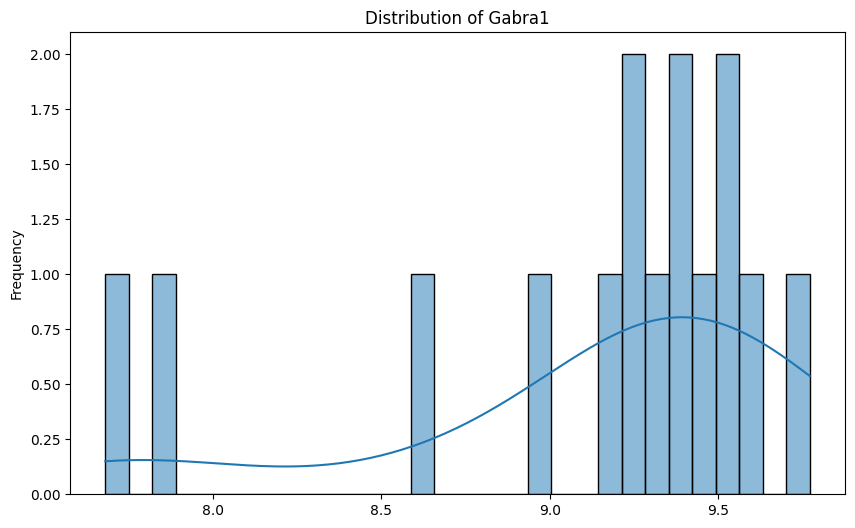

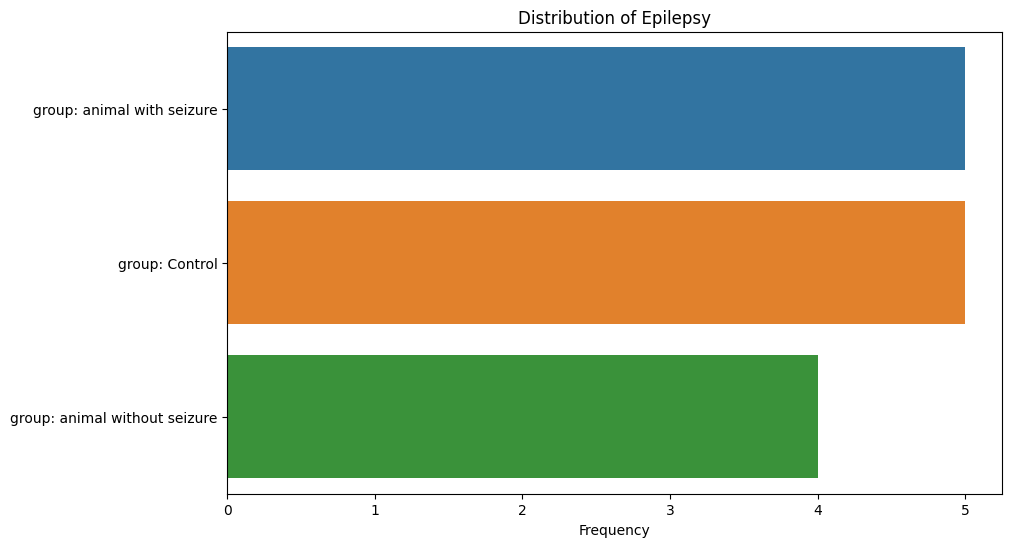

In [35]:
condition_feature_cols = condition_merged_data.columns.tolist()[:-1]
gene_list = [gene_regressors_for_condition[0]] # Only show one gene
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(condition_merged_data, numerical_columns=[ *gene_list], categorical_columns=[condition])

Do Regression Over Gene Data for Condition

In [36]:
import pandas as pd
import numpy as np
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [41]:
from sklearn.linear_model import LogisticRegression

def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Instantiate LogisticRegression with L1 regularization
        model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

        # Fit the logistic regression model on the training data
        model.fit(X_train, y_train)

        # Predict on the test data
        binary_predictions = model.predict(X_test)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

data_array_condition = condition_merged_data[gene_regressors_for_condition].values

# Normalize data
X_condition = data_array_condition
# print(X_condition.shape)

y_condition = condition_merged_data[condition].values
# print(y_condition.shape)
print(cross_validation(X_condition, y_condition))

TypeError: ignored

In [ ]:
# Select relevant columns and convert to numpy array
print("Common gene regressors for condition and trait", gene_regressors_for_condition)
data_array_condition = condition_merged_data[gene_regressors_for_condition].values


# Normalize data
X_condition = data_array_condition
X_condition, _ = preprocess_data(X_condition)

y_condition = condition_merged_data[condition].values
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_condition, y_condition)
# Implementing k-fold cross-validation

Condition Prediction

In [ ]:
data_array_common_regressors = trait_merged_data[gene_regressors_for_condition].values.astype(float)
# print(data_array_common_regressors)

X_common_regressors = data_array_common_regressors
X_common_regressors, _ = preprocess_data(X_common_regressors)

predictions_condition = model.predict_proba(X_common_regressors)[:, 1]

The Second Stage Regression Analysis

In [ ]:
trait_merged_data.insert(0, condition, predictions_condition)
trait_merged_data = trait_merged_data.drop(columns=gene_regressors_for_condition)
trait_merged_data

Preliminary Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
trait_feature_cols = trait_merged_data.columns.tolist()[:-1]
gene_list = [trait_feature_cols[1]] # [col for col in input_cols if gene in col.lower()]

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(trait_merged_data, numerical_columns=[condition,*gene_list], categorical_columns=[trait])


Do Regression & Cross Validation Over Gene Data for Trait

In [ ]:
import pandas as pd
import numpy as np
from sparse_lmm import VariableSelection


# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)


# Select relevant columns and convert to numpy array
X_trait = trait_merged_data.drop(columns=[trait]).values
y_trait = trait_merged_data[trait].values
cv_mean, cv_std = cross_validation(X_trait, y_trait)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')
